In [1]:
import pandas as pd
import os
import seaborn as sns

In [ ]:
# Загрузим датасет transaction_data.csv. 
#Проверим размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
#найдем количество пропущенных значений

In [72]:
table=pd.read_csv('transaction_data.csv',parse_dates=['date'])

In [73]:
table.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [74]:
table.dtypes

date           datetime64[ns]
name                   object
transaction            object
dtype: object

In [75]:
table.isna().date.value_counts()

False    5315
Name: date, dtype: int64

In [76]:
table.isna().name.value_counts()

False    5315
Name: name, dtype: int64

In [77]:
table.isna().transaction.value_counts()

False    5315
Name: transaction, dtype: int64

In [78]:
#какие значения принимает колонка transaction? 
#Сколько наблюдений относятся к тому или иному уровню? Визуализируем результат с помощью барплота.
# расположим уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

In [79]:
table.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [80]:
b=table.transaction.value_counts()

In [81]:
b

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

In [82]:
d=table.groupby('transaction', as_index=False).agg({'name':'count'}).sort_values('name')

In [83]:
d

,transaction,name
1,error,4
0,cancelled,1619
2,successfull,3692


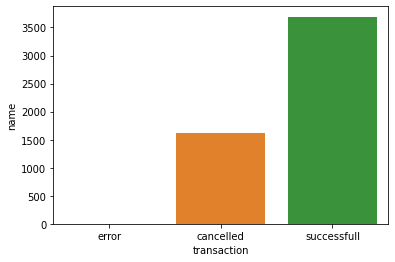

In [84]:
ax = sns.barplot(x='transaction', y='name', data=d)

In [85]:
#Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull
# построим гистограмму числа успешных транзакций, 
#совершённых каждым пользователем, где
#по оси x – число транзакций
#по оси y – доля пользователей с таким числом транзакций


In [86]:
n=table.query("transaction=='successfull'").groupby('name', as_index=False).agg({'transaction':'count'})\
.sort_values('transaction')

In [87]:
n.head()

,name,transaction
54,Vasilisa_Polyanova,46
23,Lolita_Lesnova,52
16,Julia_Lesnova,55
51,Vasilisa_Lesnova,55
37,Olga_Lesnova,56


In [88]:
n.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


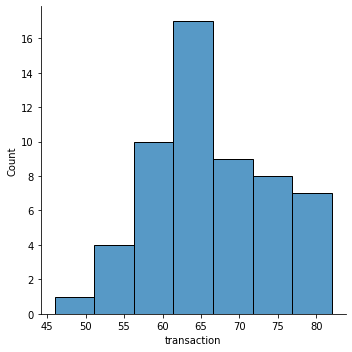

In [89]:
ax=sns.displot(n.transaction)

In [90]:
#Построим сводную таблицу user_vs_minute_pivot, где:
#столбцы – имена пользователей
#строки – минута времени осуществления операции (minute)
#значения – число совершённых операций
#Пропущенные значения заполните нулями.
#Note: фильтровать успешные транзакции не нужно

In [93]:
table['minutes']=table.date.dt.minute

In [94]:
table.head()

,date,name,transaction,minutes
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [99]:
table.groupby(['name','minutes'], as_index=False) \
            .agg({'transaction':'count'}).head()

,name,minutes,transaction
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [106]:
user_vs_minute_pivot=table.groupby(['name','minutes'], as_index=False) \
            .agg({'transaction':'count'}).pivot(index='minutes', columns='name', values='transaction').fillna(0)

In [107]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minutes,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [114]:
f=table.groupby(['minutes'], as_index=False) \
            .agg({'transaction':'count'})

In [115]:
f.head()

,minutes,transaction
0,0,111
1,1,145
2,2,123
3,3,129
4,4,92


<AxesSubplot:xlabel='minutes', ylabel='transaction'>

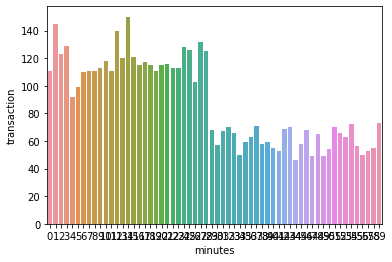

In [116]:
sns.barplot(x='minutes', y='transaction', data=f)

In [ ]:
#посчитаем число минут, прошедших с начала дня. 
#Результат сохраним в колонку true_minute. 
#Построим график, как в предыдущем шаге, и посмотрим, произошли ли изменения

In [125]:
table.assign(hours=table.date.dt.hour).head()

,date,name,transaction,minutes,hours,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,0,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,0,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,1,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,0,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,0,17


In [126]:
table['true_minute']=table.minutes+table.hours*60

In [127]:
table.head()

,date,name,transaction,minutes,hours,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37,0,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59,0,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6,1,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2,0,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17,0,17


In [128]:
g=table.groupby(['true_minute'], as_index=False) \
            .agg({'transaction':'count'})

In [129]:
g

,true_minute,transaction
0,0,64
1,1,77
2,2,68
3,3,65
4,4,57
...,...,...
85,85,68
86,86,52
87,87,59
88,88,62


<AxesSubplot:xlabel='true_minute', ylabel='transaction'>

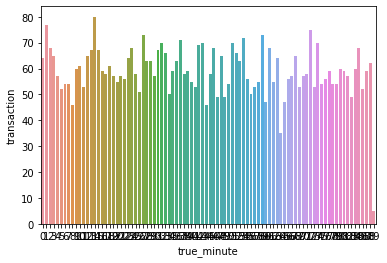

In [130]:
sns.barplot(x='true_minute', y='transaction', data=g)